<center>
<img src="https://drive.google.com/uc?id=1cwPX7BgVIwtG7Rpd9FQGdfOxaVrgaR59" alt="Descripción" width="178">

<img src="https://drive.google.com/uc?id=1bLJqVtTvaYSS46sJ_VSVmY7j8QgfhAln" alt="Descripción" width="100">
</center>

---
# **Bioinformática 2025**

---

# Bioinformática 2025 - TP Nº2: Biopython

El objetivo general de esta práctica es trabajar con diferentes funciones “útiles” asociadas al manejo de secuencias biológicas.

# Módulo 1 - Manejo de secuencias (e integración con Biopython).

En este primer módulo haremos una primera aproximación a biopython con diferentes tipos de registros de tipo Seq (formato FASTA, genebank).
Analizaremos, desde un punto de vista bioinformático secuencias y alfabetos, los procesos de transcripción y traducción.


### Objetivo 1)
Generar y analizar secuencias de proteínas al azar

En este primer objetivo trabajaremos un poco con el azar, la idea es generar secuencias al azar (o sea sin contenido de información) para luego poder contrastarlas con secuencias reales y analizar sus características.

Lo primero que hay que considerar es
como en Python obtener “azar”. Una buena manera es usar un generador de números al azar. Esto es útil en muchas aplicaciones más allá del estudio de secuencias.



### Ejercicio 1A: Secuencias aleatorias

Utilizando las funciones random, y lo que aprendimos la clase pasada ahora vamos a generar y estudiar diferentes secuencias al azar.



#### 1A Proteinas aleatorias
**I:** Escriba un código que genere secuencias de proteínas al azar de un largo preestablecido por el usuario.

**II:** Modifique el mismo tal que sea posible indicar la frecuencia o probabilidad de ocurrencia de cada uno de los 20 aminoácidos.

*Ayuda:* Puede definir un diccionario con frecuencias y usar:

>>> numpy.random.choice().

In [26]:
# Paso 1: definir los caracteres a utilizar. Puedo definir una lista con los carácteres permitidos, en este caso
# letras correspondientes al código de 1 letra por aminoácido.
# Paso 2: Elegir carácteres al azar de la lista tantas veces como largo (l) queramos que tenga la secuencia.
import random

def generar_secuencia_random(l,mode):   #el modo indica si se busca generar secuencias de ADN o aminoácidos
    aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    nucleotidos = ['A','T','C','G']
    # Generar una secuencia aleatoria con aminoácidos seleccionados uniformemente
    secuencia= ""
    for i in range(l):
        if mode == 'dna':
          valor = random.choice(nucleotidos)
        elif mode == 'protein':
          valor = random.choice(aminoacidos)
        secuencia += valor
    return secuencia

generar_secuencia_random(20,'protein')

def generar_secuencia_distribucion(l,distr):  # l es la longitud, distr permite elegir la frecuencia con que se busca obtener cada aa
    aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    secuencia= ""
    for aa in distr:
      secuencia += int(l*distr[aa]) * aa # se repite cada aminoácido las veces que corresponde
    aminoacidos_faltantes = [aa for aa in aminoacidos if aa not in distr] # se seleccionan los aminoácidos restantes

    while len(secuencia)<l:
      secuencia += random.choice(aminoacidos_faltantes) # se eligen el resto de los aa entre los restantes

    sec_lista = list(secuencia)
    random.shuffle(sec_lista)           # se distribuyen al azar todos los aminoácidos de la secuencia
    secuencia = ''.join(sec_lista)

    return secuencia


frecuencias = {'R': 0.5, 'A': 0.25, 'Q': 0.25} # La suma de frecuencias debe ser menor o igual a 1
sec = generar_secuencia_distribucion(20,frecuencias)
print(sec)

for aa in frecuencias:
  print(f'aminoácido: {aa}, f_esperada: {frecuencias[aa]}, f_obtenida: {sec.count(aa)/len(sec)}')

ARRRARQQQAQAARRRQRRR
aminoácido: R, f_esperada: 0.5, f_obtenida: 0.5
aminoácido: A, f_esperada: 0.25, f_obtenida: 0.25
aminoácido: Q, f_esperada: 0.25, f_obtenida: 0.25


#### 1B: Frecuencias en secuencias



*DETERMINAR*

**I:** la frecuencia de cada uno de los 20 aminoácidos (para un set de secuencias de proteínas) y para una secuencia de ADN a partir de los codones correspondientes.

**II:** Que el código sea capaz de mostrar los resultados en un gráfico de barras.

**III:** Ahora analice y discuta los resultados obtenidos, ¿Cómo se comparan la distribución de
aminoácidos respecto las generadas para proteínas al azar?

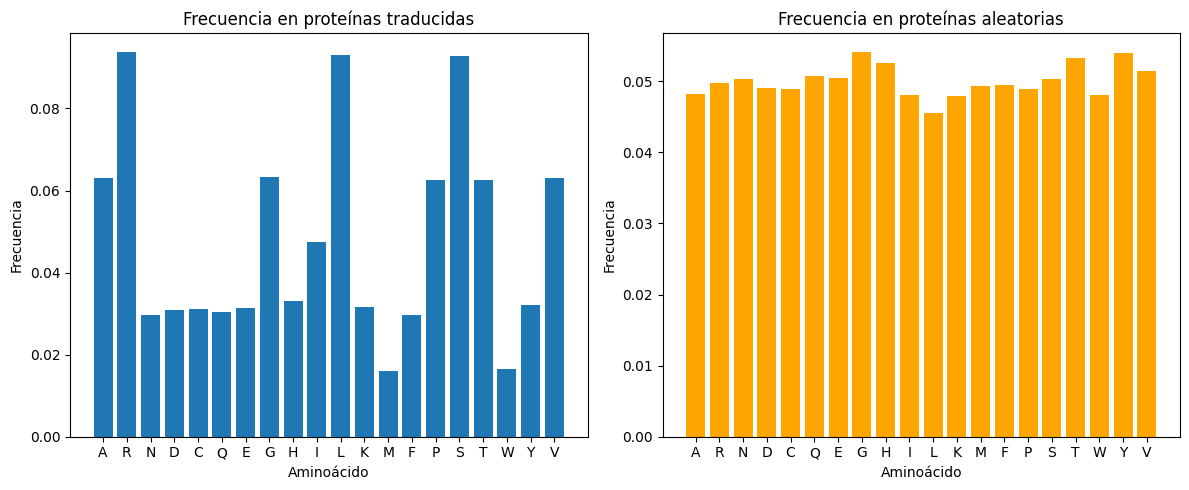

In [27]:
import matplotlib.pyplot as plt

def traducir_secuencia(sec): # Suponiendo que nos encontramos dentro del ORF y alineados correctamente dentro del frame
    ss_dict = {               # Se arma un diccionario de código genético
      'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
      'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
      'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
      'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
      'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
      'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
      'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
      'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
      'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
      'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
      'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
      'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
      'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
      'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
      'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
      'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    }
    prot_sec = ''
    for i in range (len(sec)-2):
        prot_sec += ss_dict[sec[i:i+3]]
    return prot_sec
# Esto también podría hacerse con la library biopython, pero aquí demostramos cómo se podría programar manualmente


def obtener_frecuencia_aa(sec):
  aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
  frecuencias = {aa: sec.count(aa)/len(sec) for aa in aminoacidos}
  return frecuencias

# La idea es crear dos proteínas: una obtenida a partir de una secuencia de aminoácidos al azar,
# y otra a partir de una secuencia de nucleótidos al azar, traducidos posteriormente
largo_prot = 10000      # Ambas proteínas serán de 10.000 aa

n_sec = generar_secuencia_random(largo_prot*3,'dna')
p_sec = traducir_secuencia(n_sec)
frecuencias = obtener_frecuencia_aa(p_sec)

p_sec_2 = generar_secuencia_random(largo_prot,'protein')
frecuencias_2 = obtener_frecuencia_aa(p_sec_2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primer panel: proteínas traducidas
ax1.bar(frecuencias.keys(), frecuencias.values())
ax1.set_xlabel('Aminoácido')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Frecuencia en proteínas traducidas')

# Segundo panel: proteínas aleatorias
ax2.bar(frecuencias_2.keys(), frecuencias_2.values(), color='orange')
ax2.set_xlabel('Aminoácido')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Frecuencia en proteínas aleatorias')

plt.tight_layout()
plt.show()


Al generar proteínas a partir de secuencias de aminoácidos al azar, se observa que las frecuencias de los mismos son bastante similares. Esto se debe a que todos tienen la misma probabilidad de ser elegidos para integrarse a la secuencia.
En cambio, al generarlas a partir de secuencias random de nucleótidos, se observa que los aminoácidos R (arginina), L (leucina) y S (serina) son los más frecuentes. Por el otro lado, M (metionina) y W (triptofano) son los menos frecuentes. Esto se debe a la cantidad de codones que codifican estos aminoácidos: tanto la metionina como el triptofano son el resultado de un codón específico (AUG - M; UGG - W). En cambio, los tres más frecuentes tienen 6 codones posibles cada uno, lo que explica su mayor presencia en estas secuencias.

## Objetivo 2: Introducción y uso de biopython

Biopython: “Biopython (biopython.org) is a set of freely available tools for biological computation written in Python by an international team of developers”, y como no queremos reinventar la rueda lo vamos a usar a full

se instala con: pip3 -install biopython (en linea de comando OJO)


**Para instalar Biopython en Google Colab, ejecutar la siguiente celda:**

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.0 MB/s eta 0:00:00


Ahora manos a la obra…
Las secuencias en Biopython son algo más que un String de caracteres (si bien uno los puede tratar como tales). La clave está en que los “objetos secuencia” tienen asociado un alfabeto que nos dice que significan las letras en la misma y que nos permite hacer  de manera fácil varias cosas.


In [ ]:
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

# Ejemplo: Crear una secuencia de ADN
my_seq = Seq("AGTACACTGGT")
print("Secuencia de ADN:", my_seq)

# Crear una secuencia de proteína (se utiliza la misma secuencia de letras)
my_prot = Seq("AGTACACTGGT")
print("Secuencia de proteína:", my_prot)

# Usando comandos básicos de string para calcular el contenido de GC
print("Longitud de my_seq:", len(my_seq))
print("Conteo de 'G' en my_seq:", my_seq.count("G")) # esto permite contar la cantidad de una letra
manual_gc = 100 * float(my_seq.count("G") + my_seq.count("C")) / len(my_seq) # Contar el % de esa letra, manualmente
print("Contenido GC (método manual):", manual_gc)

# Utilizando la función de Biopython (gc_fraction devuelve la fracción, se multiplica por 100 para obtener el porcentaje)
gc_content = gc_fraction(my_seq) * 100
print("Contenido GC (gc_fraction):", gc_content)

# Operaciones adicionales con la secuencia
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCTAAGCC")
print("\nSecuencia:", my_seq)
print("Longitud:", len(my_seq))
print("Complementaria:", my_seq.complement())
print("Reverso complementaria:", my_seq.reverse_complement())
print("Transcrita:", my_seq.transcribe())
print("Traducida:", my_seq.translate())

Secuencia de ADN: AGTACACTGGT
Secuencia de proteína: AGTACACTGGT
Longitud de my_seq: 11
Conteo de 'G' en my_seq: 3
Contenido GC (método manual): 45.45454545454545
Contenido GC (gc_fraction): 45.45454545454545

Secuencia: GATCGATGGGCCTATATAGGATCGAAAATCTAAGCC
Longitud: 36
Complementaria: CTAGCTACCCGGATATATCCTAGCTTTTAGATTCGG
Reverso complementaria: GGCTTAGATTTTCGATCCTATATAGGCCCATCGATC
Transcrita: GAUCGAUGGGCCUAUAUAGGAUCGAAAAUCUAAGCC
Traducida: DRWAYIGSKI*A


Nota: The translation tables available in Biopython are based on those from the NCBI (see the next section of this tutorial). By default, translation will use the standard genetic code (NCBI table id 1).

### Ejercicio 2 Introduccion Biopython

#### 2A

Utilice Biopython para trabajar con las secuencias de ADN generadas aleatoriamente:

**I:** Obtenga la secuencia reversa complementaria y compare el contenido de GC con la secuencia original.

**II:** Traduzca la secuencia y obtenga la distribución de largo de los ORFs (compare con los resultados anteriores).

In [ ]:
# Todo esto es el código que usamos antes para generar secuencias al azar

import random
import numpy as np
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

# Copiando el código utilizado previamente, genero una función que permite obtener secuencias de ADN al azar
ADN = ["A", "C", "G", "T"]
aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

def generar_secuencia_adn(longitud):
    secuencia_aleatoria = ""              # Genero un string vacío que será mi secuencia
    for i in range(longitud):
        valor = np.random.choice(ADN)     # Elige un caracter al azar dentro de las 4 bases nitrogenadas posibles
        secuencia_aleatoria += valor      # Añade el caracter a la secuencia de ADN
    return secuencia_aleatoria

# ____________________________________________________________________________________________________________________

# 1: Obtener la secuencia reversa complementaria y comparar con el contenido de GC original
# Para cuantificar el contenido GC y obtene el reverso complementario usamos la librería BioSeq

mi_secuencia = Seq(generar_secuencia_adn(21)) # Uso el formato Seq para que las funciones la reconozcan
print ("Secuencia de ADN: ", mi_secuencia)

GC_original = gc_fraction(mi_secuencia) * 100
print("Contenido GC secuencia aleatoria:", GC_original)

RevComp = mi_secuencia.reverse_complement()
print("Reverso complementaria:", RevComp) # Esta función obtiene la secuencia complementaria y la invierte
GC_revcomp = gc_fraction(RevComp) * 100
print("Contenido GC secuencia aleatoria reversa complementaria:", GC_revcomp)
 # Como se trata de la misma secuencia pero complementaria e invertida, el contenido GC es el mismo


# ¿Qué diferencia hay entre el contenido GC de la secuencia previa y la que generamos al azar?
my_seq_original = Seq("GATCGATGGGCCTATATAGGATCGAAAATCTAAGCC")
gc_content = gc_fraction(my_seq_original) * 100
print ("Contenido GC secuencia original:", gc_content)
print("Contenido GC original / Contenido GC al azar:", gc_content/GC_original)

In [ ]:
# Traduzca la secuencia y obtenga la distribución de largo de los ORFs (compare con los resultados anteriores).

mi_secuencia = Seq(generar_secuencia_adn(201))
print ("Secuencia de ADN aleatoria: ", mi_secuencia)
orfs = []

# Búsqueda en los 3 marcos de lectura directos
def buscar_orfs_adn(secuencia, min_length):  # defino la secuencia a darle y el número mínimo de bases para que el ORF sea válido
  for frame in range(3):
      for i in range(frame, len(secuencia) - 2, 3):        # Lee el marco de lectura otorgado, de a 3
          codon = secuencia[i:i+3]                         # Lee de a codones
          if codon == "ATG":  # Codón de inicio
              for j in range(i, len(secuencia) - 2, 3):
                  codon_stop = secuencia[j:j+3]
                  if codon_stop in ["TAA", "TAG", "TGA"]:  # Codones STOP
                      orf_length = j + 3 - i
                      if orf_length >= min_length:         # Filtra por longitud mínima del ORF
                         orfs.append(secuencia[i:j+3])  # Esto podríamos usarlo para que genere e imprima el ORF encontrado
                        # orfs.append(orf_length)           # Agrega únicamente la LONGITUD del ORF a la lista
                      break
  return orfs

# Ejemplo de uso
orfs_encontrados = buscar_orfs_adn(mi_secuencia, 2)

print("Longitud de los ORFs encontrados:")
for orf in orfs_encontrados:
    print(orf)
    traduc = orf.translate()
    print(f"Traducción: {traduc}")

## Objetivo 3: Descarga de secuencias y manejo de las mismas




Para Manejos de secuencia avanzados (registros de geneBank etc.) con anotaciones, biopython utiliza el objeto “SeqRecord” que se puede leer/escribir en diferentes formatos utilizando el Bio.SeqIO (Input/Output)
Con los siguientes comandos se puede dar una idea de todo lo que puede hacer…

In [ ]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
# help(SeqRecord)


Una manera de cargar un registro seqRecord es levantando un fasta (de disco), entonces carguemos un fasta en la variable mi_fasta

mi_fasta = SeqIO.read("SU FASTA FILE", "fasta")

También se puede utilizar un archivo de genebank con SeqIO.read("SU gene bank file", "genbank")

**Para chequar la importacion de archivos puntuales a analizar desde tu computadora al entorno de Google Colab>**

In [ ]:
from google.colab import files  #Para elegir el archivo de tu computadora. Se puede cargar manualmente tambien arrastrandolo a la carpeta de la izquierda
uploaded = files.upload()

In [ ]:
mi_fasta = SeqIO.parse("gene (1).fna", "fasta") # Usar parse en vez de read creo que permite manejar varios a la vez?
# mi_genebank = SeqIO.read("gene (1).fna", "genbank")
!ls #Para ver los archivos subidos en el directorio de trabajo

In [ ]:
!ls #Para corroborar que se subieron los archivos al directorio de trabajo


### Ejercicio 3A ADN



#### 3Ai) Descarga ADN y análisis
Elija un registro de geneBank y bajelo en formato fasta y gb (GenBank),  levantelos con Biopython utilizando "Bio.SeqIO" y explore sus atributos (record,  record.id, record.name, record.description, etc.)

*¿Es capaz de obtener “solo” la secuencia y convertirla en un “string” para manipularla?*


In [ ]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# El programa está teniendo problemas porque NCBI me descarga varios archivos a la vez
# Entonces le pedimos que lea únicamente el primer "archivo" que encuentre

for record in SeqIO.parse("PTTG.txt", "fasta"):
  PTTG_fasta = record  # Store the first record in PTTG_fasta
  print(PTTG_fasta)  # Or process each record individually within the loop
  break # Exit the loop after processing the first record

#### 3Aii)

Descargue la misma secuencia automáticamente usando Biopython.
Ayuda: Use Entrez.efetch() de Biopython para acceder a GenBank.

In [6]:
from Bio import Entrez
Entrez.email = "joaquinacagliero@gmail.com"

# Le pongo el código para buscar mioglobina de homo sapiens
with Entrez.efetch(db="nucleotide", id="NM_001362846", rettype="fasta", retmode="text") as handle:
    fasta_data = handle.read()

# Mostrar la secuencia en consola
print(fasta_data)

# Guardar en un archivo .fasta
with open("mioglobina.fasta", "w") as file:
    file.write(fasta_data)

>NM_001362846.2 Homo sapiens myoglobin (MB), transcript variant 4, mRNA
GGCCGCTTGGCTGGAGGCTCTGCGAGGACAGCTGGGGAGAAGGGGAGCTGTGACTGCGCCATGGGGCTCA
GCGACGGGGAATGGCAGTTGGTGCTGAACGTCTGGGGGAAGGTGGAGGCTGACATCCCAGGCCATGGGCA
GGAAGTCCTCATCAGGCTCTTTAAGGGTCACCCAGAGACTCTGGAGAAGTTTGACAAGTTCAAGCACCTG
AAGTCAGAGGACGAGATGAAGGCGTCTGAGGACTTAAAGAAGCATGGTGCCACCGTGCTCACCGCCCTGG
GTGGCATCCTTAAGAAGAAGGGGCATCATGAGGCAGAGATTAAGCCCCTGGCACAGTCGCATGCCACCAA
GCACAAGATCCCCGTGAAGTACCTGGAGTTCATCTCGGAATGCATCATCCAGGTTCTGCAGAGCAAGCAT
CCCGGGGACTTTGGTGCTGATGCCCAGGGGGCCATGAACAAGGCCCTGGAGCTGTTCCGGAAGGACATGG
CCTCCAACTACAAGGAGCTGGGCTTCCAGGGCTAGGCCCCTGCCGCTCCCACCCCCACCCATCTGGGCCC
CGGGTTCAAGAGAGAGCGGGGTCTGATCTCGTGTAGCCATATAGAGTTTGCTTCTGAGTGTCTGCTTTGT
TTAGTAGAGGTGGGCAGGAGGAGCTGAGGGGCTGGGGCTGGGGTGTTGAAGTTGGCTTTGCATGCCCAGC
GATGCGCCTCCCTGTGGGATGTCATCACCCTGGGAACCGGGAGTGGCCCTTGGCTCACTGTGTTCTGCAT
GGTTTGGATCTGAATTAATTGTCCTTTCTTCTAAATCCCAACCGAACTTCTTCCAACCTCCAAACTGGCT
GTAACCCCAAATCCAAGCCATTAACTACACCTGACAGTAGCAATTGTCTGATTAATCACTGGCCCCTTGA
AGACA

### Ejercicio 3B Proteinas

Ahora usemos biopython para bajar proteínas, para ello trabajaremos con los códigos de Uniprot (¿por qué?). Vaya a la página de Uniprot (u a otra si quiere) y baja el registro de la proteína en formato texto (el formato parsa biopython es el de swiss prot = ‘swiss). Para cargar el registro correspondiente en biopython usamos el siguiente codigo.

####  3Bi: Descarga secuencia de Proteína y análisis

Pruébelo para alguna proteína que le interesa, investigue un poco que puede hacer con el registro (use tab para ayudarse)

In [11]:
from Bio import SeqIO

prot_record = SeqIO.read('P69905.txt', format='swiss') #reemplazar mi_uniprot por el nombre
print(prot_record.id)
print(prot_record)
print(prot_record.name)
print(prot_record.description)

P69905
ID: P69905
Name: HBA_HUMAN
Description: RecName: Full=Hemoglobin subunit alpha; AltName: Full=Alpha-globin; AltName: Full=Hemoglobin alpha chain; Contains: RecName: Full=Hemopressin {ECO:0000303|PubMed:18077343};
Database cross-references: EMBL:J00153, EMBL:V00491, EMBL:V00493, EMBL:V00488, EMBL:V00516, EMBL:AF230076, EMBL:AF525460, EMBL:DQ431198, EMBL:AF097635, EMBL:AF105974, EMBL:AF349571, EMBL:AF536204, EMBL:DQ499017, EMBL:DQ499018, EMBL:AK223392, EMBL:AE006462, EMBL:Z84721, EMBL:BC005931, EMBL:BC008572, EMBL:BC032122, EMBL:BC050661, EMBL:BC101846, EMBL:BC101848, CCDS:CCDS10398.1, CCDS:CCDS10399.1, PIR:A90807, PIR:C93303, PIR:I58217, RefSeq:NP_000508.1, RefSeq:NP_000549.1, PDB:1A00, PDB:1A01, PDB:1A0U, PDB:1A0Z, PDB:1A3N, PDB:1A3O, PDB:1A9W, PDB:1ABW, PDB:1ABY, PDB:1AJ9, PDB:1B86, PDB:1BAB, PDB:1BBB, PDB:1BIJ, PDB:1BUW, PDB:1BZ0, PDB:1BZ1, PDB:1BZZ, PDB:1C7B, PDB:1C7C, PDB:1C7D, PDB:1CLS, PDB:1CMY, PDB:1COH, PDB:1DKE, PDB:1DXT, PDB:1DXU, PDB:1DXV, PDB:1FDH, PDB:1FN3, PDB:1G9V

#### 3Bii:

Ahora vamos a bajarlo directamente de la web para usamos ExPASy (puede ver si hay otras..)


In [ ]:
# Ingrese su codigo aqui
from Bio import ExPASy
from Bio import SwissProt
handle = ExPASy.get_sprot_raw("P02144")
record = SwissProt.read(handle)
handle.close()
print(record.entry_name)

MYG_HUMAN


#### 3Biii

Combine lo aprendido en la clase previas (for / while loops) y/o la información disponible en biopython para cargar un conjunto de secuencias de ADN y/o proteínas. (Puede bajarlos manualmente a disco y realizar código para cargarlos y/o hacer el código que los baje directamente de internet).

Obtenga solo las secuencias como cadenas de caracteres y guardelas en una lista tal que cada elemento de la lista sea una de las secuencias.

In [13]:
# Voy a hacerlo bajando secuencias de internet
from Bio import Entrez, SeqIO
Entrez.email = "joaquinacagliero@gmail.com"  # NCBI requiere un email para identificar al usuario

def descargar_secuencias_ncbi(ids, db="nucleotide"): # podemos usar base de datos de nucleótidos o de proteínas ("protein")
    secuencias = []
    for id_ in ids:
        with Entrez.efetch(db=db, id=id_, rettype="fasta", retmode="text") as handle: # abre una conexión a Entrez para descargar el archivo en formato fasta
            for record in SeqIO.parse(handle, "fasta"):  #lee el archivo en formato fasta
                secuencias.append(str(record.seq)) # convierte la secuencia en un string normal y la guarda en la lista de secuencias
    return secuencias

# Ejemplo de uso
ids = ["NM_000546", "NM_000321"]  # IDs de secuencias de genes. Elegimos p53 y Rb.
lista_secuencias = descargar_secuencias_ncbi(ids)
print(lista_secuencias)

['CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGCAGCCAGACTGCCTTCCGGGTCACTGCCATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGGCCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAGACTCCAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCGGCGCACAGAGG

## Objetivo 4: Mis primeros programas bioinformáticos y análisis de secuencias avanzado. Para entregar en el informe.

Ahora combinaremos todo lo aprendido anteriormente para realizar nuestro primer programa bioinformático que consiste en un detector de ORFs a partir de una secuencia de ADN (que podría provenir de un genoma). Como cualquier programa complejo, el mismo va utilizar diferentes módulos y además requerirá combinar código de diferentes miembros del grupo, el objetivo entonces es:
i) organizar un programa complejo en módulos de código, y
ii) trabajar en equipo.

Para facilitar esta tarea, el ejercicio 4 está dividido en módulos/secciones.

===> Como grupo traten primero de organizar el código general y luego repartan y organicen cada módulo.


### Ejercicio 4) Comparación de distribuciones

Escribir un código que dada una secuencia de ADN determine los ORF y les asigne una probabilidad de ser (o no) un gen/exón.

Para ello deberia comparar el largo del ORF y la distribucion de aminoacidos de la secuencia traducida con eso mismo en secuencias naturales y en secuencias al azar.



In [ ]:
def buscar_orfs_adn(secuencia, min_length):  # defino la secuencia a darle y el número mínimo de bases para que el ORF sea válido
  for frame in range(3):
      for i in range(frame, len(secuencia) - 2, 3):        # Lee el marco de lectura otorgado, de a 3
          codon = secuencia[i:i+3]                         # Lee de a codones
          if codon == "ATG":  # Codón de inicio
              for j in range(i, len(secuencia) - 2, 3):
                  codon_stop = secuencia[j:j+3]
                  if codon_stop in ["TAA", "TAG", "TGA"]:  # Codones STOP
                      orf_length = j + 3 - i
                      if orf_length >= min_length:         # Filtra por longitud mínima del ORF
                         orfs.append(secuencia[i:j+3])  # Esto podríamos usarlo para que genere e imprima el ORF encontrado
                        # orfs.append(orf_length)           # Agrega únicamente la LONGITUD del ORF a la lista
                      break
  return orfs

  # Opción 1: establecer un límite mínimo de aminoácidos que tiene que tener una secuencia para considerarse un ORF
  # Opción 2: comparar la distribución de aminoácidos, ver si todos tienen la misma probabilidad de aparecer o no (chi-cuadrado)

**Compare gráficamente las siguientes distribuciones**

#### 4a:
Compare gráficamente la distribución de aminoácidos de secuencia de proteínas al azar vs secuencias de proteínas reales.




In [16]:
# Paso 1: generar secuencias de proteínas al azar
import random
import numpy as np
import matplotlib.pyplot as plt

def generar_secuencia(longitud):                    # La función pide el número de aminoácidos que incluye la secuencia
    secuencia= ""
    for i in range(longitud):
        valor = np.random.choice(aminoacidos)
        secuencia += valor                          # Añade un aminoácido al azar a la secuencia final
    return secuencia

aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

# Paso 1.5: obtener la distribución de aminoácidos de esas proteínas
import matplotlib.pyplot as plt
from collections import Counter

def calcular_distribucion_aa_random(secuencia_proteina):
    frecuencia = Counter(secuencia_proteina)      # Función que cuenta la frecuencia de cada "letra" de la secuencia
    frecuencias_relativas = {aa: count / len(secuencia_proteina) for aa, count in frecuencia.items()} # Permite obtener frecuencias relativas de cada aminoácido
    print (frecuencias_relativas)
    return frecuencias_relativas

def graficar_distribucion(frecuencia_aa, mode):
    aminoacidos = list(frecuencia_aa.keys())
    frecuencias = list(frecuencia_aa.values()) # toma los valores de frecuencia de cada aminoácido

    plt.figure(figsize=(10, 5))
    plt.xlabel("Aminoácidos")
    plt.ylabel("Frecuencia")
    if mode == "azar":
        plt.title("Distribución de Aminoácidos en una secuencia al azar")
        plt.bar(aminoacidos, frecuencias, color = "#aceed2", edgecolor = "grey")
    elif mode == "real":
        plt.title("Distribución de Aminoácidos en una secuencia real")
        plt.bar(aminoacidos, frecuencias, color = "#DEA9FF", edgecolor = "grey")
    plt.show()

In [17]:
# Paso 2: Obtener secuencias reales de aminoácidos de una base de datos (NCBI)
# Para este caso elegimos acceder a las secuencias directamente de internet
from Bio import Entrez, SeqIO
Entrez.email = "joaquinacagliero@gmail.com"  # NCBI requiere un email para identificar al usuario

def descargar_secuencias_ncbi(ids, base_de_datos): # podemos usar base de datos de nucleótidos o de proteínas ("protein")
    secuencias = []
    for id_ in ids:
        with Entrez.efetch(db=base_de_datos, id=id_, rettype="fasta", retmode="text") as handle: # abre una conexión a Entrez para descargar el archivo en formato fasta
            for record in SeqIO.parse(handle, "fasta"):  #lee el archivo en formato fasta
                secuencias.append(str(record.seq)) # convierte la secuencia en un string normal y la guarda en la lista de secuencias
    return secuencias

# Paso 2.5: obtener la distribución de aminoácidos. No me sirve el código usado antes.
def calcular_distribucion_aa_real(secuencia_proteina):
    aa_secuencia = ''.join(secuencia_proteina)        # convierte las secuencias obtenidas de elementos en una lista a string
    frecuencia = Counter(aa_secuencia)      # Cuenta la frecuencia de cada "letra" de la secuencia
    frecuencias_relativas = {aa: count / len(aa_secuencia) for aa, count in frecuencia.items()} # Permite obtener frecuencias relativas de cada aminoácido
    print (frecuencias_relativas)
    return frecuencias_relativas

Secuencia generada al azar:  GWFPMNKSQSTPHRFQDPGWASDRCVFWYCTEDNVCQHKRCKDGDWPSNPCCCQCSVSSTLYMKIVDKLGHWWSTFFGFILCESHVIQGDRLREEKQVTLKENQESGTWEKDIPTKWVCFASWVIPGRPQVELVTVLIYIPGGPVQCAIYRVGWQSWLCEVQAKLQWRWDMMDCEYCCSRKPHWAAWPNMKKHSMTCYVVREDDLLDPGLEYAGLFMRMYGWSRKWFPTHDLYMNVIPGADAWTDPTSVARPDGSISPCCYNWYYCAFVSHVAWDASWHTKASSNTQTNYHILLMWTHLYMSDCYTVYQMNREHFMCWVNATQWSDTQKIRHNNAPWRFNQWIRFYSNQAPEDKMEFYVWEYVHHHHPAQMAMHYEGTRCVFLNNKNDLWISCWVMLNIWKAQSSDTIRITKFLCTKPGKPMKPEWLLWGSFSYFHGVQHAYYQLYQDGCLEGANENIHVPHFCTFTHECKSETIWPFKGELAPYDLVKQLTDTNMFKQYQKLTTRMYQCPLERGSEAPHCANVCSSSQNHATGRRVEFFDYTLHFYLFGVIHPSTSRCHDDDLIFAHLRLNWSIWVHEYWRHPDTFNTSKSFLCGKHIRNHVLPDTVEDWNGITETCASLFYNNEASCNLICDPLVMNVKVIIISVRKHHVTVRHPFMPPVSNDLKTEYYDGMIHASADPYFSKIDMMNFWSCLMIDVQCYGAHLHDMNGPGALCFDHIRHEVFQTENTVICRFDKPRAPRDEIEPLGSENQSLHDFFYLYDGKNRNQAIKMHRRFKCIRWQMNRPIDRDTLCQWIVIRGMLSLCSPKTCYEPGYHAIYDRRGWHLKMWCYVPICYKESLFFCQMPHVLGMINNIVKIWLGCRNIVSSLSPGVRDNEWAFPLAWGMQATQDAFDHQCCQFQPDDISWAANWNDHLQKSQMYYNMHKLPFSLNDAEESYEPHLHMKEIGAIPFPHTMTKCSLSLTYLLSTY

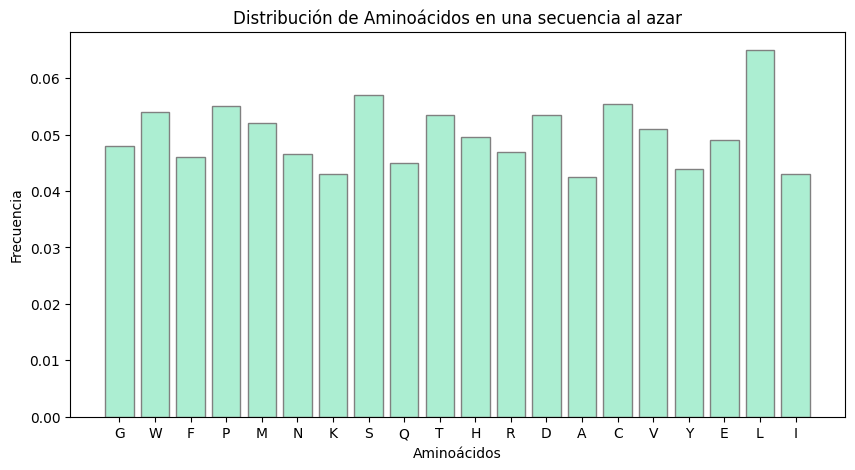

Secuencias obtenidas de NCBI:  ['MHGGGPPSGDSACPLRTIKRVQFGVLSPDELKRMSVTEGGIKYPETTEGGRPKLGGLMDPRQGVIERTGRCQTCAGNMTECPGHFGHIELAKPVFHVGFLVKTMKVLRCVCFFCSKLLVDSNNPKIKDILAKSKGQPKKRLTHVYDLCKGKNICEGGEEMDNKFGVEQPEGDEDLTKEKGHGGCGRYQPRIRRSGLELYAEWKHVNEDSQEKKILLSPERVHEIFKRISDEECFVLGMEPRYARPEWMIVTVLPVPPLSVRPAVVMQGSARNQDDLTHKLADIVKINNQLRRNEQNGAAAHVIAEDVKLLQFHVATMVDNELPGLPRAMQKSGRPLKSLKQRLKGKEGRVRGNLMGKRVDFSARTVITPDPNLSIDQVGVPRSIAANMTFAEIVTPFNIDRLQELVRRGNSQYPGAKYIIRDNGDRIDLRFHPKPSDLHLQTGYKVERHMCDGDIVIFNRQPTLHKMSMMGHRVRILPWSTFRLNLSVTTPYNADFDGDEMNLHLPQSLETRAEIQELAMVPRMIVTPQSNRPVMGIVQDTLTAVRKFTKRDVFLERGEVMNLLMFLSTWDGKVPQPAILKPRPLWTGKQIFSLIIPGHINCIRTHSTHPDDEDSGPYKHISPGDTKVVVENGELIMGILCKKSLGTSAGSLVHISYLEMGHDITRLFYSNIQTVINNWLLIEGHTIGIGDSIADSKTYQDIQNTIKKAKQDVIEVIEKAHNNELEPTPGNTLRQTFENQVNRILNDARDKTGSSAQKSLSEYNNFKSMVVSGAKGSKINISQVIAVVGQQNVEGKRIPFGFKHRTLPHFIKDDYGPESRGFVENSYLAGLTPTEFFFHAMGGREGLIDTAVKTAETGYIQRRLIKSMESVMVKYDATVRNSINQVVQLRYGEDGLAGESVEFQNLATLKPSNKAFEKKFRFDYTNERALRRTLQEDLVKDVLSNAHIQNELEREFERMREDREVLR

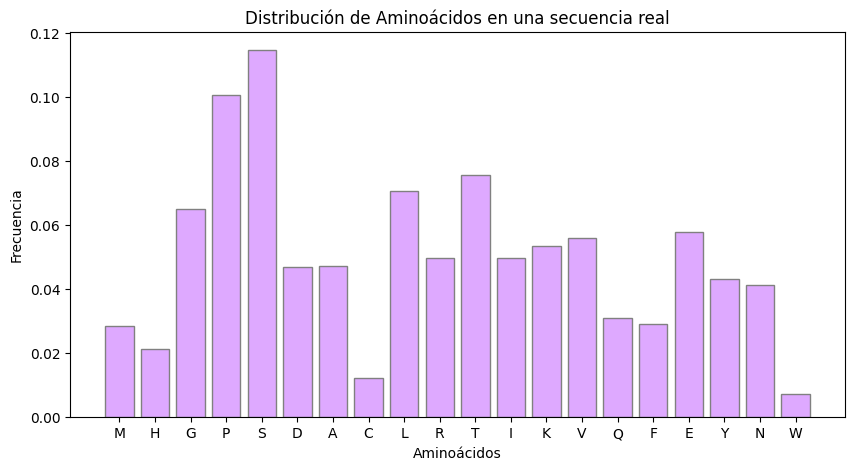

In [18]:
# Graficamos las secuencias obtenidas
secuencia_random_4 = generar_secuencia(2000)
print ("Secuencia generada al azar: ", secuencia_random_4)
frecuencia_alazar = calcular_distribucion_aa_random(secuencia_random_4)
graficar_distribucion(frecuencia_alazar, "azar")

ids = ["NP_000928.1"]  # IDs de secuencias de genes. Elegimos una subunidad de la RNA polimerasa II de homo sapiens, de 1970 aa
secuencia_real_4 = descargar_secuencias_ncbi(ids, "protein")
print("Secuencias obtenidas de NCBI: ", secuencia_real_4)
frecuencia_real = calcular_distribucion_aa_real(secuencia_real_4)
graficar_distribucion(frecuencia_real, "real")

# Paso 3: Comparar dichas distribuciones gráficamente


Se observa que, en las secuencias de aminoácidos generadas al azar, la frecuencia de los distintos aminoácidos son mucho más similares entre sí que en las secuencias obtenidas de una base de datos. En este último caso se ve una muy baja frecuencia de triptofano y cisteína con respecto al resto. Los aminoácidos más frecuentes son serina y prolina. En el ejercicio 1 vimos que ambos tienen 6 codones posibles que los codifican, lo que podría explicar su marcada abundancia.

{'A': 0.0455, 'Y': 0.0625, 'K': 0.0535, 'V': 0.048, 'W': 0.0485, 'T': 0.043, 'R': 0.055, 'D': 0.0495, 'F': 0.0505, 'E': 0.054, 'I': 0.0485, 'M': 0.0515, 'G': 0.053, 'H': 0.0485, 'C': 0.047, 'P': 0.049, 'N': 0.0605, 'S': 0.044, 'Q': 0.0495, 'L': 0.0385}


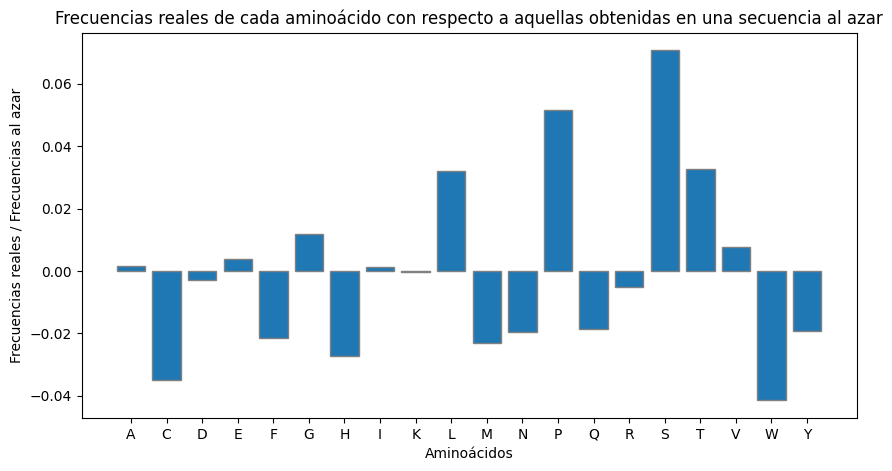

In [21]:
# ¿En qué aminoácidos se observan más diferencias entre las frecuencias al azar y las reales?

# Esta función devuelve un diccionario, a cada aminoácido le corresponde la diferencia entre la frecuencia real y la esperada si fuera random
def obtener_diferencia_frecuencias(frecuencia_azarosas, frecuencia_reales):
    resultado = {}      # el resultado es una lista de valores, para cada aminoácido
    aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    for aa in sorted(aminoacidos):  # con esta sección indico si algún aminoácido NO está presente en algunas de las secuencias
        f_azar = frecuencia_azarosas.get(aa, 0)
        f_real = frecuencia_reales.get(aa, 0)
        if f_azar == 0:
            print(f"Aminoácido '{aa}' no está presente en la secuencia al azar.")
        if f_real == 0:
            print(f"Aminoácido '{aa}' no está presente en la secuencia real.")

    for aa in frecuencia_reales:      # recorre cada aminoácido de la secuencia real
      if aa in frecuencia_azarosas and frecuencia_reales[aa] != 0:  # es decir, si el aminoácido está presente en ambas secuencias
        resultado[aa] = frecuencia_reales[aa] - frecuencia_azarosas[aa]
      else:
        resultado[aa] = 0  # o podrías poner 0 o np.nan
    return resultado


frecuencia_alazar = calcular_distribucion_aa_random(generar_secuencia(2000))
comparacion_freqs = obtener_diferencia_frecuencias(frecuencia_alazar, frecuencia_real)
def graficar_comparacion(comparacion_freqs):
  plt.figure(figsize=(10, 5))
  aminoacidos_ordenados = sorted(comparacion_freqs.keys()) # esto me permite que los aminoácidos y valores vayan en un orden determinado
  valores_ordenados = [comparacion_freqs[aa] for aa in aminoacidos_ordenados]
  plt.bar(aminoacidos_ordenados, valores_ordenados, edgecolor = "grey")
  plt.xlabel("Aminoácidos")
  plt.ylabel("Frecuencias reales / Frecuencias al azar")
  plt.title("Frecuencias reales de cada aminoácido con respecto a aquellas obtenidas en una secuencia al azar")
  plt.show()

graficar_comparacion(comparacion_freqs)

#### 4b:
 Analice cómo cambian las distribuciones al aumentar el tamaño de la secuencia “al azar” analizada, y al incrementar el número de secuencias reales analizadas. ¿Cuándo es suficiente?

***Ayuda***: seaborn.histplot() o matplotlib.pyplot.hist() pueden ayudar con las comparaciones

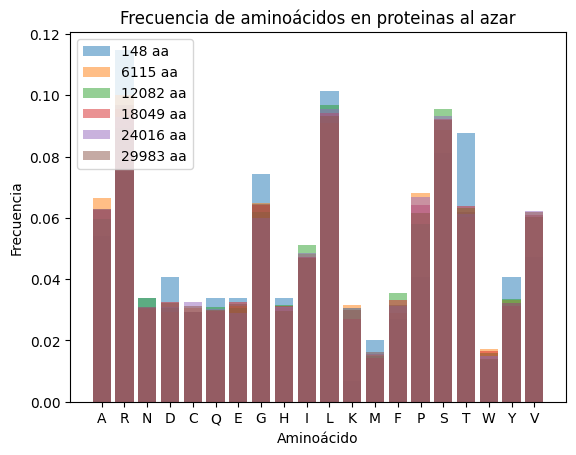

In [42]:
# Cuanto mayor es el largo de las secuencias, más se aproxima la frecuencia a la probabilidad de obtener ese aminoacido en una secuencia de nucleótidos al azar traducida.
# Un valor lo suficientemente alto sería aquel 

import matplotlib.pyplot as plt

min_l=50
max_l=10000
n=5

for i in range(min_l, max_l, (max_l-min_l-1)//n):
    n_sec = generar_secuencia_random(i * 3, 'dna')
    p_sec = traducir_secuencia(n_sec)
    frecuencias = obtener_frecuencia_aa(p_sec)
    
    aas = list(frecuencias.keys())
    freqs = list(frecuencias.values())
    
    # Agregar etiqueta con el tamaño de la proteína
    etiqueta = f'{len(p_sec)} aa'
    
    plt.bar(aas, freqs, alpha=0.5, label=etiqueta)

plt.title("Frecuencia de aminoácidos en proteinas al azar")
plt.xlabel("Aminoácido")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()




In [ ]:
# Para buscar varias secuencias al azar en NCBI, puedo hacer que busque al azar dentro de un determinado organismo

from Bio import Entrez, SeqIO
import random
Entrez.email = "joaquinacagliero@gmail.com"

def buscar_proteinas_al_azar(query, cantidad, database):
    # Paso 1: Buscar muchas proteínas con la query que le dé, por ejemplo, "homo sapiens"
    handle = Entrez.esearch(db=database, term=query, retmax=1000)
    record = Entrez.read(handle)
    todos_los_ids = record["IdList"]

    # Paso 2: Filtrar si hay menos resultados de lo requerido
    if cantidad > len(todos_los_ids):
        print("Hay menos resultados que la cantidad solicitada.")
        cantidad = len(todos_los_ids)

    ids_seleccionados = random.sample(todos_los_ids, cantidad) # randomiza los resultados obtenidos

    # Paso 3: Descargar las secuencias
    secuencias = []
    for id_ in ids_seleccionados:
        with Entrez.efetch(db=database, id=id_, rettype="fasta", retmode="text") as handle:
            for record in SeqIO.parse(handle, "fasta"):
                secuencias.append(str(record.seq))
    string_secuencia = ''.join(secuencias)
    longitud = len(string_secuencia)

    # Paso 4: Imprimir las secuencias obtenidas
    # print(f"\n Se descargaron {len(secuencias)} secuencias.") # esto es un chequeo
    print(f"Longitud total: {longitud} aminoácidos.")
    return string_secuencia, longitud

Longitud total: 317 aminoácidos.
{'F': 0.05362776025236593, 'Y': 0.05362776025236593, 'C': 0.05993690851735016, 'E': 0.0473186119873817, 'V': 0.03785488958990536, 'I': 0.04100946372239748, 'M': 0.056782334384858045, 'S': 0.050473186119873815, 'N': 0.04416403785488959, 'D': 0.05362776025236593, 'P': 0.0473186119873817, 'R': 0.056782334384858045, 'A': 0.05993690851735016, 'Q': 0.05362776025236593, 'K': 0.0473186119873817, 'W': 0.04100946372239748, 'H': 0.03785488958990536, 'G': 0.06624605678233439, 'T': 0.050473186119873815, 'L': 0.04100946372239748}
{'M': 0.01892744479495268, 'N': 0.0473186119873817, 'F': 0.04416403785488959, 'E': 0.0694006309148265, 'K': 0.06309148264984227, 'I': 0.0694006309148265, 'Q': 0.07886435331230283, 'A': 0.08517350157728706, 'Y': 0.03785488958990536, 'T': 0.03785488958990536, 'L': 0.138801261829653, 'V': 0.0473186119873817, 'D': 0.07886435331230283, 'S': 0.07570977917981073, 'G': 0.03785488958990536, 'R': 0.015772870662460567, 'W': 0.00946372239747634, 'P': 0.

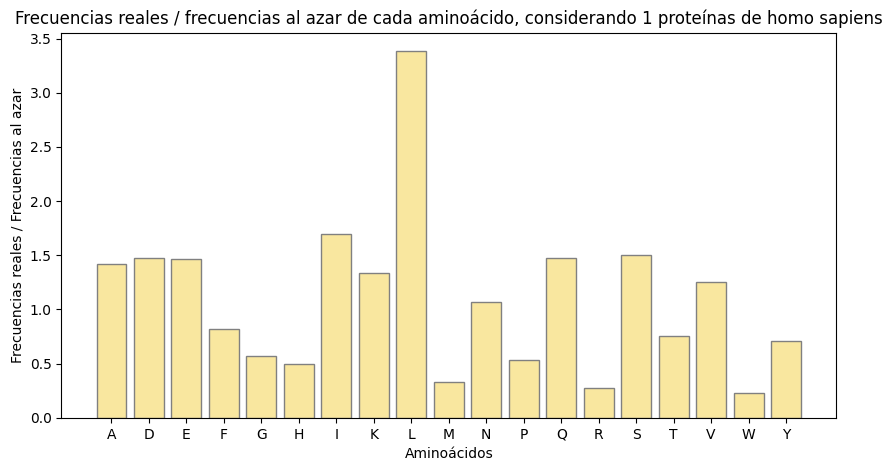

Longitud total: 1091 aminoácidos.
{'K': 0.05041246562786435, 'Q': 0.05774518790100825, 'V': 0.04949587534372136, 'S': 0.04766269477543538, 'Y': 0.05316223648029331, 'W': 0.044912923923006415, 'D': 0.043996333638863426, 'H': 0.05224564619615032, 'N': 0.06049495875343722, 'T': 0.044912923923006415, 'E': 0.05316223648029331, 'M': 0.04216315307057745, 'R': 0.05682859761686526, 'C': 0.051329055912007336, 'P': 0.031164069660861594, 'I': 0.051329055912007336, 'L': 0.05866177818515124, 'A': 0.05866177818515124, 'G': 0.05041246562786435, 'F': 0.04124656278643447}
{'M': 0.032080659945004586, 'V': 0.07791017415215398, 'T': 0.051329055912007336, 'A': 0.076993583868011, 'I': 0.07241063244729606, 'D': 0.06049495875343722, 'N': 0.04124656278643447, 'F': 0.044912923923006415, 'E': 0.07332722273143905, 'K': 0.0843263061411549, 'G': 0.06232813932172319, 'L': 0.07516040329972502, 'W': 0.010999083409715857, 'C': 0.008249312557286892, 'P': 0.03299725022914757, 'R': 0.027497708524289642, 'Q': 0.043996333638

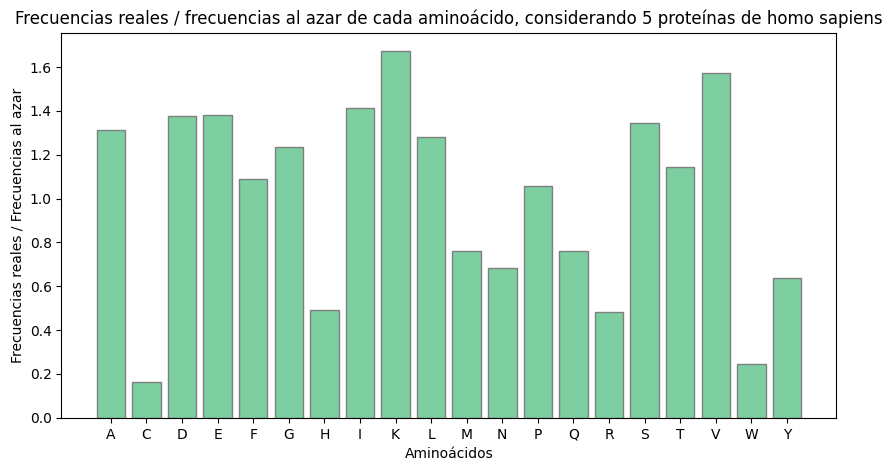

Longitud total: 3001 aminoácidos.
{'G': 0.04598467177607464, 'E': 0.055981339553482175, 'R': 0.04665111629456848, 'L': 0.054315228257247584, 'Q': 0.05498167277574142, 'P': 0.050983005664778404, 'K': 0.04598467177607464, 'A': 0.055981339553482175, 'V': 0.03798733755414862, 'N': 0.052649116961012994, 'W': 0.05064978340553149, 'I': 0.04965011662779074, 'Y': 0.0546484505164945, 'D': 0.04598467177607464, 'C': 0.05231589470176608, 'T': 0.04931689436854382, 'F': 0.05064978340553149, 'S': 0.04298567144285238, 'M': 0.05298233922025991, 'H': 0.04931689436854382}
{'M': 0.023658780406531157, 'K': 0.07230923025658113, 'E': 0.06264578473842053, 'G': 0.07230923025658113, 'R': 0.04131956014661779, 'H': 0.021326224591802733, 'V': 0.06731089636787738, 'I': 0.07197600799733422, 'L': 0.09330223258913696, 'Q': 0.036654448517160945, 'D': 0.05631456181272909, 'S': 0.055981339553482175, 'N': 0.05131622792402533, 'T': 0.05998000666444518, 'A': 0.0793068977007664, 'C': 0.00433188937020993, 'F': 0.04798400533155

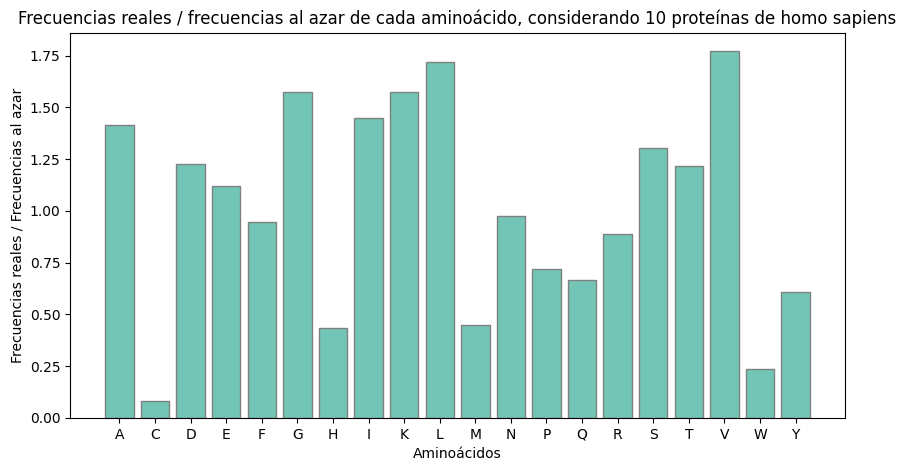

Longitud total: 5188 aminoácidos.
{'S': 0.048766383962991516, 'E': 0.053777949113338476, 'P': 0.058596761757902856, 'D': 0.05146491904394757, 'T': 0.04799537393986122, 'R': 0.048959136468774096, 'W': 0.053585196607555896, 'Y': 0.05088666152659985, 'L': 0.054548959136468775, 'I': 0.053777949113338476, 'N': 0.04818812644564379, 'F': 0.044911333847340015, 'K': 0.04934464148033924, 'M': 0.047802621434078645, 'A': 0.04433307632999229, 'C': 0.047802621434078645, 'H': 0.05185042405551272, 'V': 0.049730146491904395, 'G': 0.04664610639938319, 'Q': 0.047031611410948346}
{'M': 0.023323053199691596, 'G': 0.057440246723207404, 'N': 0.047031611410948346, 'H': 0.017733230531996914, 'T': 0.058596761757902856, 'D': 0.058596761757902856, 'E': 0.06515034695451041, 'C': 0.00520431765612953, 'L': 0.10292983808789515, 'K': 0.07151117964533539, 'R': 0.03353893600616808, 'Y': 0.03835774865073246, 'Q': 0.04452582883577486, 'I': 0.07266769468003084, 'A': 0.07247494217424827, 'S': 0.06187355435620663, 'V': 0.072

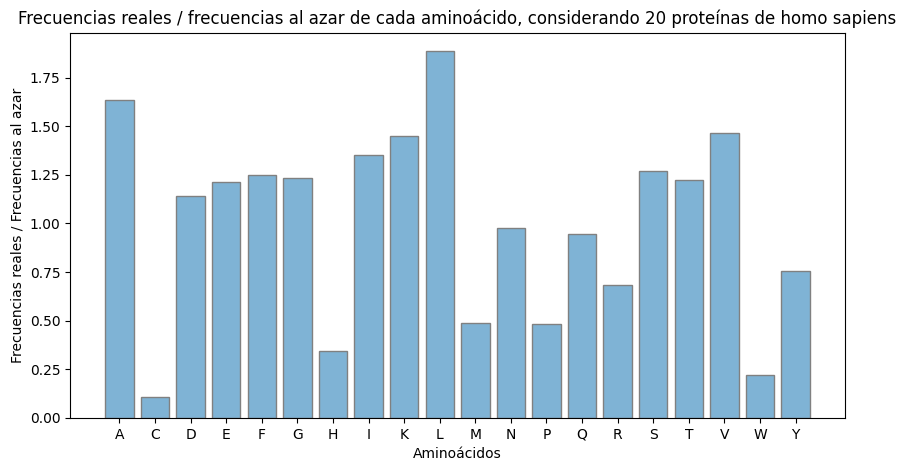

Longitud total: 12513 aminoácidos.
{'P': 0.05106689043394869, 'H': 0.051466474866139214, 'R': 0.049628386478062815, 'F': 0.04906896827299608, 'T': 0.05434348277791097, 'Q': 0.048030048749300724, 'G': 0.05082713977463438, 'D': 0.05130664109326301, 'C': 0.051466474866139214, 'L': 0.048909134500119876, 'K': 0.048909134500119876, 'W': 0.047790298089986416, 'I': 0.04842963318149125, 'E': 0.05138655797970111, 'M': 0.05042755534244386, 'N': 0.05066730600175817, 'S': 0.05050747222888196, 'A': 0.049628386478062815, 'V': 0.04842963318149125, 'Y': 0.047710381203548306}
{'M': 0.027890993366898424, 'K': 0.06625109885718852, 'Q': 0.03995844321905218, 'I': 0.0769599616398945, 'V': 0.06792935347238871, 'T': 0.05442339966434908, 'L': 0.09829777031886838, 'E': 0.07368336929593224, 'N': 0.045472708383281386, 'S': 0.05937824662351155, 'C': 0.007032686006553185, 'H': 0.022136977543354912, 'F': 0.038200271717413886, 'G': 0.06824902101814113, 'D': 0.054982817869415807, 'A': 0.0785582993686566, 'Y': 0.0364421

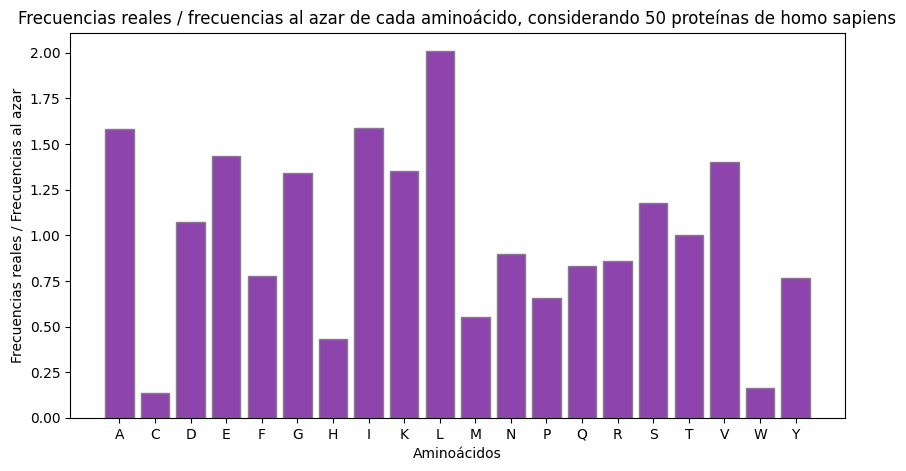

In [ ]:
# Genero listas de aminoácidos a partir de las secuencias obtenidas al azar y de bases de datos
# Mi idea es: busco una cierta cantidad de secuencias y analizo la longitud en total. Luego genero una secuencia al azar de la misma longitud, y las comparo

colores_graficos = ["#d98880", "#f9e79f", "#7dcea0", "#73c6b6", "#7fb3d5", "#8e44ad"]
j = 1
cantidad_proteinas = [1, 5, 10, 20, 50]
for i in cantidad_proteinas: # este algoritmo busca una cierta cantidad de proteínas de homo sapiens al azar, y genera una secuencia de nucleótidos. Se espera que la secuencia final sea más larga, al buscar más proteínas en la base de datos.
  secuencias_real_4b, longitud = buscar_proteinas_al_azar("homo sapiens", i, "protein")
  secuencias_azar_4b = generar_secuencia(longitud)
 # print ("Secuencia real: ", secuencias_real_4b)
 # print ("Secuencia al azar: ", secuencias_azar_4b)

  frecuencias_azar = calcular_distribucion_aa_random(secuencias_azar_4b)
  frecuencias_real = calcular_distribucion_aa_real(secuencias_real_4b)

  # graficar_distribucion(frecuencias_azar, "azar")
  # graficar_distribucion(frecuencias_real, "real")

  comparacion_freqs = dividir_frecuencias(frecuencias_azar, frecuencias_real)
  aminoacidos_ordenados = sorted(comparacion_freqs.keys()) # esto me permite que los aminoácidos y valores vayan en un orden determinado
  valores_ordenados = [comparacion_freqs[aa] for aa in aminoacidos_ordenados]
  plt.figure(figsize=(10, 5))
  plt.bar(aminoacidos_ordenados, valores_ordenados, color = colores_graficos[j] , edgecolor = "grey")
  j = j + 1
  plt.title(f"Frecuencias reales / frecuencias al azar de cada aminoácido, considerando {i} proteínas de homo sapiens")
  plt.xlabel("Aminoácidos")
  plt.ylabel("Frecuencias reales / Frecuencias al azar")
  plt.show()


**siento que acá hay que agarrar el gráfico de distribución de aminoácidos promedio (no lo encuentro) y compararlo con el gráfico final ESPERANDO QUE SEAN PARECIDOS **

Habrá notado que en los ejercicios anteriores sería muy útil tener una métrica  (programada) que permita comparar distribuciones. Existen numerosas métricas estadísticas que permiten comparar distribuciones (i,e chi cuadrado),  una muy simple es determinar la diferencia cuadrática media de cada uno de los “bins” del histograma de la distribución.

**Comparación de distribuciones con métricas.**

#### 4c:
Elija una métrica que permita comparar dos distribuciones. (p.ej., chi-cuadrado, MSE).



In [ ]:
# Elegimos chi-cuadrado como métrica
from scipy.stats import chisquare
def comparar_chi_cuadrado(dist1, dist2): # la función requiere que ambas distribuciones sean diccionarios con las mismas claves, ordenadas. Esto es un problema si alguna secuencia NO contiene un aminoácido
    claves_ordenadas = sorted(set(dist1.keys()) | set(dist2.keys()))
    # Crea listas de frecuencias, rellenando con 0 si la clave no está presente
    valores1 = [dist1.get(clave, 0) for clave in claves_ordenadas]
    valores2 = [dist2.get(clave, 0) for clave in claves_ordenadas]
    # Test de chi-cuadrado: valores1 son los observados, valores2 los esperados
    stat, p = chisquare(f_obs=valores1, f_exp=valores2)
    # print("Estadístico chi-cuadrado:", stat)
    # print("Valor p:", p)

    if p < 0.05:
        print("Diferencia significativa entre las distribuciones (p < 0.05)")
    else:
        print("No hay diferencia significativa (p ≥ 0.05)")

    return stat, p

In [ ]:
# Control negativo: pruebo hacer este test con dos secuencias al azar
seq1 = generar_secuencia(100)
seq2 = generar_secuencia(100)
freqs1 = calcular_distribucion_aa_random(seq1)
freqs2 = calcular_distribucion_aa_random(seq2)
comparar_chi_cuadrado(freqs1, freqs2)

{'R': 0.07, 'I': 0.08, 'W': 0.07, 'H': 0.03, 'Q': 0.04, 'Y': 0.08, 'G': 0.05, 'K': 0.03, 'S': 0.03, 'N': 0.05, 'F': 0.03, 'M': 0.09, 'D': 0.06, 'A': 0.03, 'E': 0.04, 'V': 0.07, 'T': 0.03, 'L': 0.05, 'C': 0.07}
{'A': 0.08, 'R': 0.04, 'F': 0.04, 'Y': 0.06, 'C': 0.04, 'I': 0.06, 'H': 0.07, 'E': 0.07, 'V': 0.05, 'D': 0.04, 'N': 0.03, 'K': 0.03, 'P': 0.04, 'L': 0.07, 'G': 0.06, 'Q': 0.05, 'T': 0.05, 'W': 0.06, 'S': 0.04, 'M': 0.02}
No hay diferencia significativa (p ≥ 0.05)


(np.float64(0.46567857142857144), np.float64(0.9999999999993061))

In [ ]:
# Control positivo: una proteína larga, conocida (en este caso, la actina del tomate), comparada con una secuencia al azar

secuencia_conocida = descargar_secuencias_ncbi(["NP_001317048.1"], "protein")
secuencia_random = generar_secuencia(len(secuencia_conocida)) # para comparar dos secuencias de igual longitud
freqs_conocida = calcular_distribucion_aa_real(secuencia_conocida)
freqs_random = calcular_distribucion_aa_random(secuencia_random)
comparar_chi_cuadrado(freqs_conocida, freqs_random)

{'M': 0.042440318302387266, 'A': 0.07957559681697612, 'D': 0.058355437665782495, 'G': 0.07957559681697612, 'E': 0.07427055702917772, 'I': 0.07427055702917772, 'Q': 0.026525198938992044, 'P': 0.05305039787798409, 'L': 0.07161803713527852, 'V': 0.06896551724137931, 'C': 0.010610079575596816, 'N': 0.021220159151193633, 'T': 0.0636604774535809, 'K': 0.05305039787798409, 'F': 0.029177718832891247, 'R': 0.04774535809018567, 'S': 0.07161803713527852, 'H': 0.023872679045092837, 'Y': 0.03978779840848806, 'W': 0.010610079575596816}
{'P': 1.0}
Diferencia significativa entre las distribuciones (p < 0.05)


(np.float64(inf), np.float64(0.0))

#### 4d:

Escriba un código que dadas dos distribuciones las compare y obtenga la métrica correspondiente. Utilicela para:

***i:** ver como evoluciona las distribuciones obtenidas en 4a(i) al aumentar el tamaño de la muestra.

**ii:** estudiar de manera sistemática las diferencias entre las distribuciones obtenidas en 4a para diferentes muestras.


In [ ]:
# Paso 1: usar el código que aumenta el tamaño de mi muestra. Lo sacamos del punto 4b:
cantidad_proteinas = [1, 5, 20, 50]
for i in cantidad_proteinas:
  secuencias_real_4d, longitud = buscar_proteinas_al_azar("homo sapiens", i, "protein")
  secuencias_azar_4d = generar_secuencia(longitud)

  frecuencias_azar = calcular_distribucion_aa_random(secuencias_azar_4d)
  frecuencias_real = calcular_distribucion_aa_real(secuencias_real_4d)
# Paso 2: agregarle el paso de chi-cuadrado
  chi_cuadrado = comparar_chi_cuadrado(frecuencias_azar, frecuencias_real)
  print(f"El p valor para {i} proteínas es de {chi_cuadrado[0]}")

Longitud total: 1464 aminoácidos.
{'K': 0.050546448087431695, 'D': 0.04644808743169399, 'R': 0.04644808743169399, 'C': 0.04234972677595628, 'V': 0.04781420765027322, 'W': 0.05122950819672131, 'I': 0.05259562841530055, 'Y': 0.04918032786885246, 'H': 0.049863387978142076, 'Q': 0.06284153005464481, 'M': 0.056010928961748634, 'G': 0.04644808743169399, 'E': 0.04781420765027322, 'A': 0.04644808743169399, 'S': 0.04371584699453552, 'T': 0.05874316939890711, 'P': 0.05669398907103825, 'F': 0.05327868852459016, 'N': 0.055327868852459015, 'L': 0.036202185792349725}
{'M': 0.03278688524590164, 'S': 0.0430327868852459, 'T': 0.056010928961748634, 'F': 0.05327868852459016, 'E': 0.08401639344262295, 'I': 0.06352459016393443, 'L': 0.07923497267759563, 'N': 0.04644808743169399, 'Q': 0.045081967213114756, 'D': 0.06420765027322405, 'P': 0.040300546448087435, 'R': 0.03825136612021858, 'A': 0.07923497267759563, 'H': 0.029371584699453553, 'V': 0.06830601092896176, 'W': 0.006147540983606557, 'G': 0.065573770491

*En este caso, estudiando hasta 50 proteínas (un total de casi 15000 aminoácidos), no se encuentran diferencias significativas entre las distribuciones al azar y no al azar en secuencias de aminoácidos.*

Ahora ya usted y su grupo deberían tener todos los elementos necesarios para realizar un programa que sea capaz de, dada una secuencia de ADN detectar los posibles ORFs y asignarles una probabilidad de efectivamente corresponder a una secuencia codificante.

#### 4e: Detector de ORFs

Con todo lo aprendido anteriormente escriba un código que:

**i:** levante una secuencia de ADN

**ii:** Obtenga los 6 marcos de lectura posibles y determine los ORFs de cada uno de ellos.

**iii:** Para cada ORF determine a) la longitud del mismo y b) la distribución de aminoácidos.

**iv:** En base a lo analizado previamente determine a partir del largo y la distribución una probabilidad de corresponder (o no) a una región codificante.

**v:** Para probar su programa diseñe: a) un control positivo b) un control negativo, luego obtenga de alguna base de datos de secuencias genómicas la secuencia de un gen eucariota completo y corra su programa. Compare sus resultados con lo esperado.
¿Qué modificaciones podría agregar para mejorar su capacidad predictiva?


In [ ]:
# Vamos a recopilar todo el código escrito a lo largo de este trabajo

# Paso 1: levantar una secuencia de ADN
from Bio import Entrez, SeqIO
Entrez.email = "joaquinacagliero@gmail.com"

def descargar_secuencias_ncbi(ids, base_de_datos):
    secuencias = []
    for id_ in ids:
        with Entrez.efetch(db=base_de_datos, id=id_, rettype="fasta", retmode="text") as handle:
            for record in SeqIO.parse(handle, "fasta"):  #lee el archivo en formato fasta
                secuencias.append(str(record.seq))
    return secuencias
# Paso 2: obtener los 6 marcos de lectura posibles y determinar sus ORF
def buscar_orfs_adn(secuencia, min_length):  # defino la secuencia a darle y el número mínimo de bases para que el ORF sea válido
  orfs = []
  for frame in range(3):
      for i in range(frame, len(secuencia) - 2, 3):        # Lee el marco de lectura otorgado, de a 3
          codon = secuencia[i:i+3]                         # Lee de a codones
          if codon == "ATG":  # Codón de inicio
              for j in range(i, len(secuencia) - 2, 3):
                  codon_stop = secuencia[j:j+3]
                  if codon_stop in ["TAA", "TAG", "TGA"]:  # Codones STOP
                      orf_length = j + 3 - i
                      if orf_length >= min_length:         # Filtra por longitud mínima del ORF
                         orfs.append(secuencia[i:j+3])  # Esto podríamos usarlo para que genere e imprima el ORF encontrado
                        # orfs.append(orf_length)           # Agrega únicamente la LONGITUD del ORF a la lista
                      break
  return orfs

# Paso 3: al obtener los orfs, determinar su longitud y distribución de aminoácidos
def longitud_y_distribucion(orf):
  orf = ''.join(orf)
  longitud = len(orf)
  frecuencia = Counter(orf)
  frecuencias_relativas = {aa: count / longitud for aa, count in frecuencia.items()}
  return longitud, frecuencias_relativas

# Paso 4: determinar a partir del largo y distribución la probabilidad de ser un orf

# Para eso primero creamos una función que determina si una secuencia es o no un ORF
def es_orf(secuencia):
    orf = ''.join(orf)
    codon_iniciacion = "ATG"
    codon_stop = ["TAA", "TAG", "TGA"]
    if len(secuencia) % 3 != 0: # filtra si la secuencia no está compuesta por tripletes
        print("La secuencia no está compuesta por tripletes")
        return False
    if not secuencia.startswith(codon_iniciacion): # filtra si inicia con un AUG
        print("No inicia con un codón de iniciación")
        return False
    codones = [secuencia[i:i+3] for i in range(0, len(secuencia), 3)]
    if codones[-1] not in codon_stop: # filtra si el último codón es un STOP
        print("No termina con un codón de STOP")
        return False
    for codon in codones[1:-1]:       # filtra si hay codones STOP prematuros
        if codon in codon_stop:
            print("Hay un codón de STOP prematuro")
            return False
    if len(secuencia) < 100:
        print("La secuencia es demasiado corta")
        return False
    return True # si no se cumple ninguna de estas condiciones, es un codón

# Paso 4.1: determinar la probabilidad a partir del largo (es decir, que supere un umbral)
def estimar_probabilidad_orf_por_azar(longitud, n_simulaciones):# genera varias secuencias al azar y analiza cuántos orfs encontró en las mismas
    orfs_azar = 0
    for i in range(n_simulaciones):
        sec = generar_secuencia(longitud)
        if es_orf(sec):
            orfs_azar += 1
    prob_azar = orfs_azar / n_simulaciones
    prob_real = 1 - prob_azar
    print(f"Longitud: {longitud} nt ({longitud//3} aa)")
    print(f"Probabilidad de ORF por azar: {prob_azar:.6f}")
    print(f"Probabilidad de que sea un ORF real: {prob_real:.6f}")
    return prob_real
# Paso 4.2: determinar según el test chi-cuadrado

# comparar_chi_cuadrado(dist1, dist2)


In [ ]:
# Testeamos la función es_orf
actina_tomate = descargar_secuencias_ncbi(["NM_001330119.1"], "nucleotide") #Volvemos a usar como ejemplo la actina del tomate
print(orf_actina)
# print(longitud_y_distribucion(orf_actina))
buscar_orfs_adn(actina_tomate, 30) # esto no está funcionando :(
# estimar_probabilidad_orf_por_azar(longitud, n_simulaciones) # todavía no pude testearla

['CGCGGGTGGTTAGTTGAGCCGGCTCCGGCGGGGAAGGAGGCGGGCTGCGGCTGCGGCTGGGGCTGAAGCTGGGGCTGGGGTTGGGGGACTGCCCGGGGCTTAGATGGCTCCGAGCCCGTTTGAGCGTGGTCTCGGACTGCTAACTGGACCAACGGCAACTGTCTGATGAGTGCCAGCCCCAAACCGCGCGCTGCTCGGGACCTTAGAGCCTCTGACTCAGGCTGGAAGATTTGAGAGCTGGATTAAGTACTTGTTGGCTCACGCCCGTGACTGTTCCGCTGTTTAGCTCTTGTTTTTTGTGTGGACACTCCTAGGATAGAAAGTTTGGTATGTTGCTATACCTTTGCTTCTCCCACCTTCCCCAATATCTAATATGTATTTCTCATTCTTAGAATAATCCAGAATGGCTACTCTGATCTATGTTGATAAGGAAAATGGAGAACCAGGCACCCGTGTGGTTGCTAAGGATGGGCTGAAGCTGGGGTCTGGACCTTCAATCAAAGCCTTAGATGGGAGATCTCAAGTTTCAACACCACGTTTTGGCAAAACGTTCGATGCCCCACCAGCCTTACCTAAAGCTACTAGAAAGGCTTTGGGAACTGTCAACAGAGCTACAGAAAAGTCTGTAAAGACCAAGGGACCCCTCAAACAAAAACAGCCAAGCTTTTCTGCCAAAAAGATGACTGAGAAGACTGTTAAAGCAAAAAGCTCTGTTCCTGCCTCAGATGATGCCTATCCAGAAATAGAAAAATTCTTTCCCTTCAATCCTCTAGACTTTGAGAGTTTTGACCTGCCTGAAGAGCACCAGATTGCGCACCTCCCCTTGAGTGGAGTGCCTCTCATGATCCTTGACGAGGAGAGAGAGCTTGAAAAGCTGTTTCAGCTGGGCCCCCCTTCACCTGTGAAGATGCCCTCTCCACCATGGGAATCCAATCTGTTGCAGTCTCCTTCAAGCATTCTGTCGACCCTGGATGTTGAATTGCCACCTGTTTGCTGTG

[]

In [ ]:
# Paso 5: generar control negativo (secuencia al azar) y positivo (secuencia al azar a la que le agregamos un codón de iniciación y un STOP)

# Material de referencia

Tutorial de Biopython: https://biopython.org/wiki/Documentation
Documentación de SeqIO: https://biopython.org/wiki/SeqIO
Base de datos de UniProt: https://www.uniprot.org/
Base de datos GenBank: https://www.ncbi.nlm.nih.gov/genbank/
